In [2]:
setwd('/import/DB/fel/BJTC-204')

In [3]:
load('/import/mdd.rna/GSE101521.rda')

count = expr3

dim(expr3)

rownames(count) = count[,1]

count = count[,-1]

count['SERPINH1',]

library(dplyr)

cli = cli %>% dplyr::filter(V4 =='Male')

library(dplyr)

cli$V2 = gsub('MDD-S','MDD',cli$V2) 

table(cli$V2)

rownames(cli) = cli[,1]

con.sample = cli %>%  dplyr::filter(V2 =='CON') %>% rownames()

MDD.sample = cli %>%  dplyr::filter(V2 =='MDD') %>% rownames()

control = count[,con.sample]
MDD = count[,MDD.sample]

exp <- cbind(control, MDD)

prot = c('H4C3','PRSS3','TUSC3')



exp = exp[unique(prot),]

exp = na.omit(exp)

dim(exp)

group=c(rep("control",dim(control)[2]),rep("MDD",dim(MDD)[2])) 

head(cli,2)

exp = exp[,rownames(cli)]

[1] 33714    60

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SERPINH1,23.89512,31.1991,14.57295,30.94508,26.01062,651.4357,21.21053,1443.247,186.2445,39.98714,...,27.94649,24.57362,96.4509,19.60175,40.79904,19.91537,29.82948,31.49361,16.68676,25.91386



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





CON MDD 
 23  19 

[1]  3 42

,V1,V2,V3,V4
,<chr>,<chr>,<int>,<chr>
V35,V35,MDD,19,Male
V36,V36,MDD,67,Male


In [4]:
exp = log(edgeR::cpm(exp) + 1)

In [5]:
expr = exp %>% t() %>%  as.data.frame() %>% tibble::rownames_to_column(.,'V1')

In [6]:
data = cbind(cli,expr)

In [7]:
data$Group = ifelse(data$V2 == 'MDD',1,0)

In [8]:
fold_pre <- glm(Group~PRSS3+TUSC3,data=data,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=data)

options(repr.plot.width = 6)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



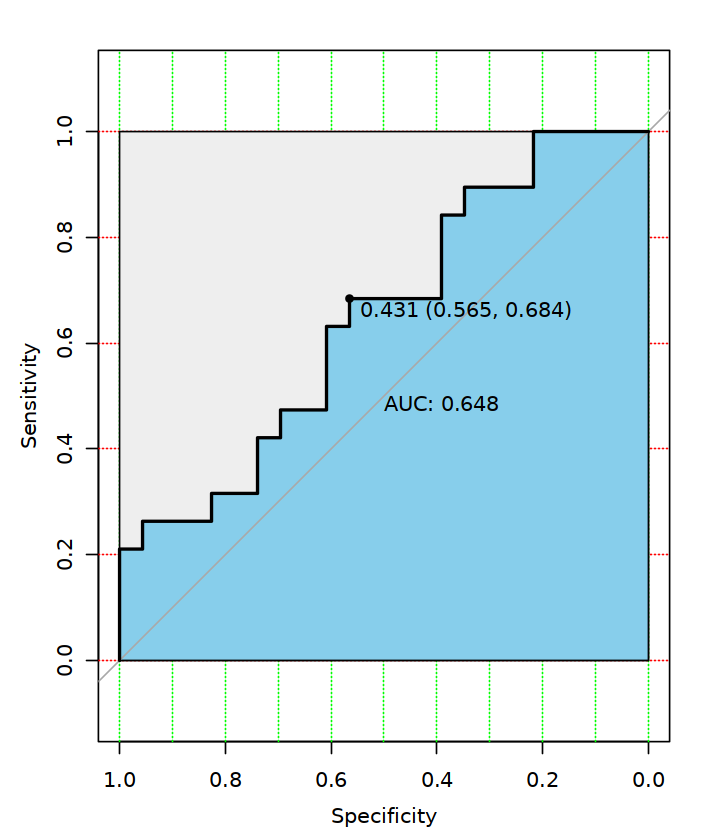

In [9]:
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [10]:
fold_pre <- glm(Group~H4C3+TUSC3+PRSS3,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [11]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [12]:
pdf('./figure/fig7.testset2.roc.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(data$Group, data$H4C3,percent=TRUE, levels=c(1,0),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$PRSS3,percent=TRUE, levels=c(1,0),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$TUSC3,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
legend("topleft", legend=c(paste0("H4C3 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("PRSS3 ", round(rocobj2$auc/100,digits = 2)),
                               paste0("TUSC3 ", round(rocobj3$auc/100,digits = 2)),
                               paste0("model_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70"), lwd=1)
dev.off()

png 
  2